In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.shape

(5728, 2)

In [4]:
#Data Cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement
#Website
#Deploy

## 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(33)

In [8]:
df=df.drop_duplicates(keep = 'first')

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(5695, 2)

## 2. EDA

In [11]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [12]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

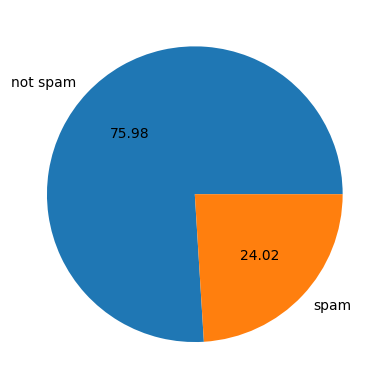

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

##  Data is imbalanced

In [14]:
%pip install nltk
import nltk
nltk.download('punkt_tab')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jahna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['num_characters'] = df['text'].apply(len)

In [16]:
df.head()

,text,spam,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [17]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,text,spam,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [19]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [22]:
# not spam
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [23]:
# spam
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [24]:
%pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_characters', ylabel='Count'>

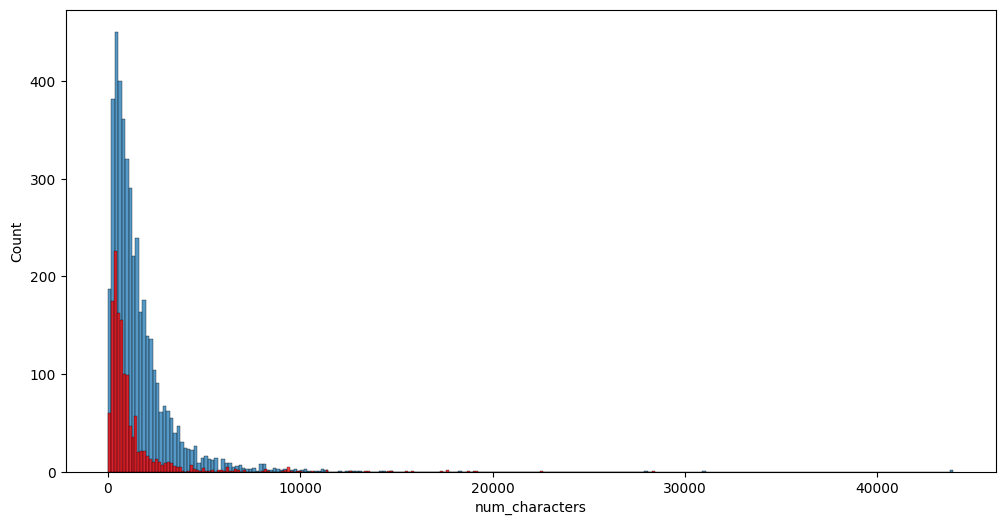

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

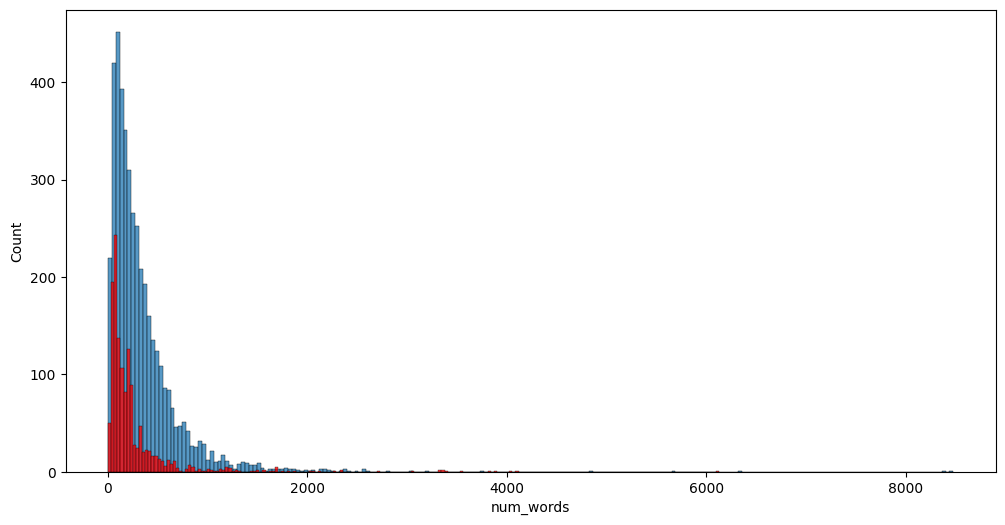

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'],color='red')

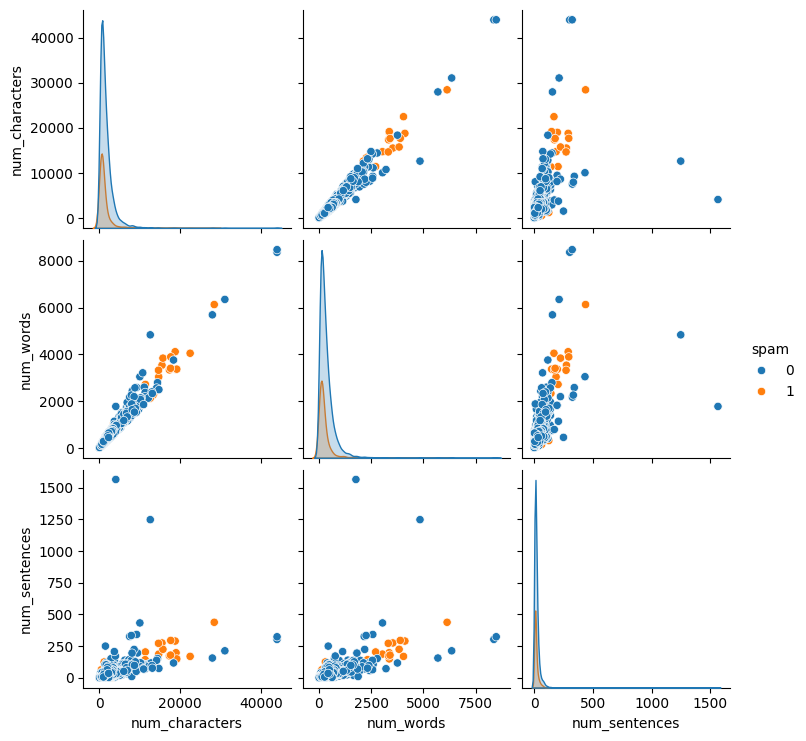

In [27]:
sns.pairplot(df,hue='spam')

<Axes: >

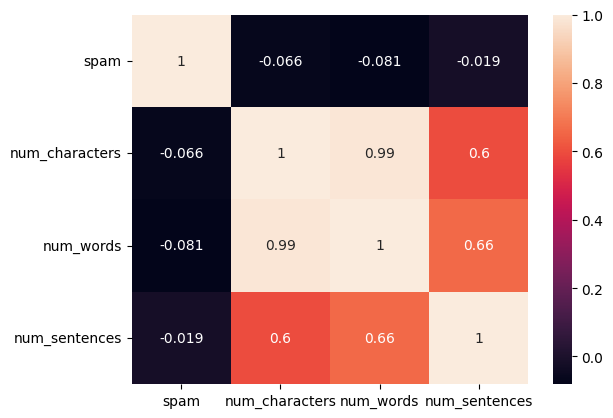

In [28]:

sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

## 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [34]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [35]:
transform_text(" I liked the ML lectures. Did you like iT?")

'like ml lectur like'

In [36]:
df['text'][2000]

'Subject: update - reimbursement of individually billed items  the use of cell phones and pagers has increased dramatically in the past few  years . as a result the accounts payable department has seen a rapid increase  in the number of invoices and vendors . with the higher volume , we have  reviewed our processes in order to continue our rapid payment cycle .  although we encourage vendors to address their invoices to individual  employees , they often mail invoices directly to accounts payable . at times  they fail to list the individual who uses the pager or cell phone . in these  cases we return the invoice to the vendor . if the employee is designated , we  try to track him / her down and forward the invoice . the high level of  employee movement among jobs and locations at enron has made this  increasingly challenging . either way , we end up doing something less  productive than paying invoices .  to maintain satisfactory response to our vendors and to reduce time necessary  fo

In [37]:
transform_text("Subject: update - reimbursement of individually billed items  the use of cell phones and pagers has increased dramatically in the past few  years . as a result the accounts payable department has seen a rapid increase  in the number of invoices and vendors . with the higher volume , we have  reviewed our processes in order to continue our rapid payment cycle .  although we encourage vendors to address their invoices to individual  employees , they often mail invoices directly to accounts payable . at times  they fail to list the individual who uses the pager or cell phone . in these  cases we return the invoice to the vendor . if the employee is designated , we  try to track him / her down and forward the invoice . the high level of  employee movement among jobs and locations at enron has made this  increasingly challenging . either way , we end up doing something less  productive than paying invoices .  to maintain satisfactory response to our vendors and to reduce time necessary  for research , we request that employees who have pagers , cell phones , and  other individually billed items such as licenses , subscriptions , etc . , pay  for them by personal check or charge card ( if applicable \x01 * payment instructions  are usually indicated on the invoice ) and request reimbursement through  employee expense reports .  by submitting these charges on your expense report , you can help us reduce  the amount of time spent researching and forwarding invoices , the number of  checks generated by treasury , the number of vendors in our database , and the  turnaround time for payment of invoices .  incidentally , accounts payable is currently installing a corporate - wide  web - based expense reporting system similar to what enron international has  used for the past year . this will make it even easier to file your expense  report and receive quick reimbursement .  we \x01 , d like to make this effective immediately . if you have any questions or  suggestions , please contact the accounts payable department .")

'subject updat reimburs individu bill item use cell phone pager increas dramat past year result account payabl depart seen rapid increas number invoic vendor higher volum review process order continu rapid payment cycl although encourag vendor address invoic individu employe often mail invoic directli account payabl time fail list individu use pager cell phone case return invoic vendor employe design tri track forward invoic high level employe movement among job locat enron made increasingli challeng either way end someth less product pay invoic maintain satisfactori respons vendor reduc time necessari research request employe pager cell phone individu bill item licens subscript etc pay person check charg card applic payment instruct usual indic invoic request reimburs employe expens report submit charg expens report help us reduc amount time spent research forward invoic number check gener treasuri number vendor databas turnaround time payment invoic incident account payabl current in

In [38]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [41]:
%pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep=" "))

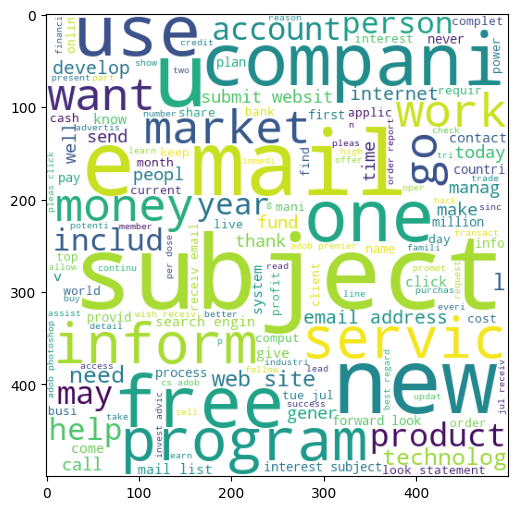

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
notspam_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=" "))

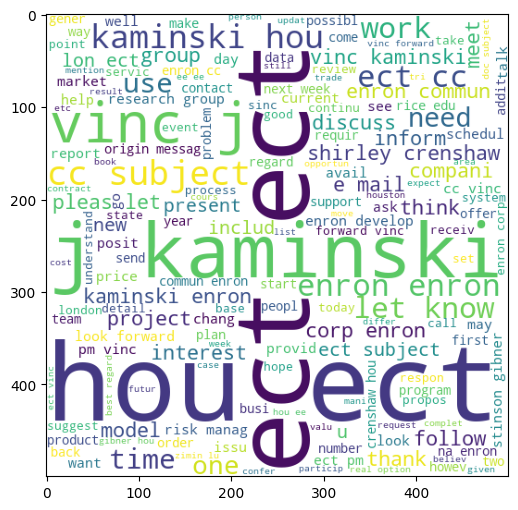

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(notspam_wc)

In [46]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [47]:
spam_corpus = []
for msg in df[df['spam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

174630

In [49]:
df[df['spam']==1]['transformed_text'].tolist()

['subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn lik

In [50]:
spam_corpus = []
for msg in df[df['spam']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

174630

In [52]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


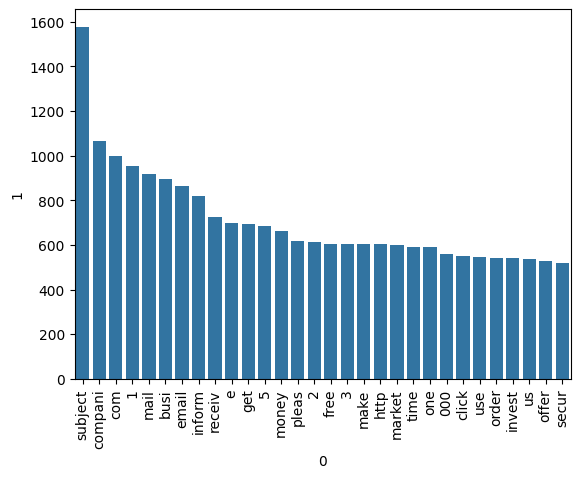

In [53]:
from collections import Counter

# Create the barplot with correct DataFrame columns
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [54]:
notspam_corpus = []
for msg in df[df['spam']==0]['transformed_text'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)

In [55]:
len(notspam_corpus)

702991

In [56]:
from collections import Counter
pd.DataFrame(Counter(notspam_corpus).most_common(30))

,0,1
0,enron,13335
1,ect,11410
2,subject,8565
3,vinc,8468
4,hou,5567
5,2000,4932
6,kaminski,4754
7,pleas,4440
8,com,4397
9,would,4124


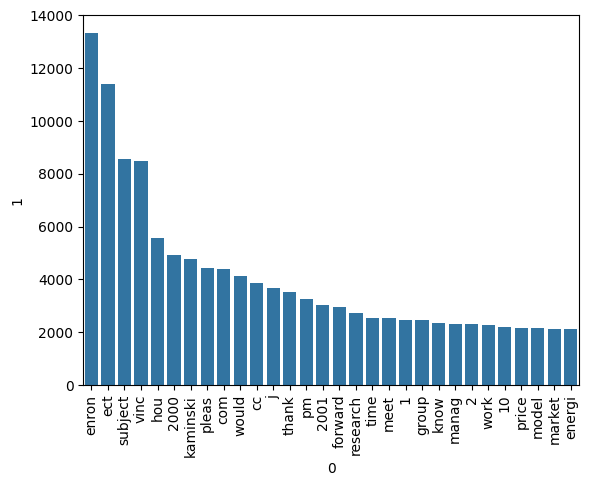

In [57]:
from collections import Counter

# Create the barplot with correct DataFrame columns
sns.barplot(x=pd.DataFrame(Counter(notspam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(notspam_corpus).most_common(30))[1])

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [58]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


## 4. MODEL BUILDING

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5695, 3000)

In [62]:
y = df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0], shape=(5695,))

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9499561018437226
[[837  12]
 [ 45 245]]
0.953307392996109


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[786  63]
 [  2 288]]
0.8205128205128205


In [70]:
# tfidf --> MNB

In [71]:
%pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9885864793678666, 0.9893992932862191)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9885864793678666
Precision -  0.9893992932862191
For  KN
Accuracy -  0.9762949956101844
Precision -  0.9747292418772563
For  NB
Accuracy -  0.9850746268656716
Precision -  0.989247311827957
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.971027216856892
Precision -  0.9706959706959707
For  RF
Accuracy -  0.9868305531167691
Precision -  0.992831541218638
For  AdaBoost
Accuracy -  0.9525899912203687
Precision -  0.8881578947368421
For  BgC
Accuracy -  0.9666374012291484
Precision -  0.9344827586206896
For  ETC
Accuracy -  0.9780509218612818
Precision -  0.9925650557620818
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9580152671755725
For  xgb
Accuracy -  0.9859525899912204
Precision -  0.9628378378378378


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.986831,0.992832
8,ETC,0.978051,0.992565
0,SVC,0.988586,0.989399
2,NB,0.985075,0.989247
1,KN,0.976295,0.974729
4,LR,0.971027,0.970696
10,xgb,0.985953,0.962838
9,GBDT,0.956102,0.958015
7,BgC,0.966637,0.934483
6,AdaBoost,0.952590,0.888158


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.986831
1,ETC,Accuracy,0.978051
2,SVC,Accuracy,0.988586
3,NB,Accuracy,0.985075
4,KN,Accuracy,0.976295
5,LR,Accuracy,0.971027
6,xgb,Accuracy,0.985953
7,GBDT,Accuracy,0.956102
8,BgC,Accuracy,0.966637
9,AdaBoost,Accuracy,0.952590


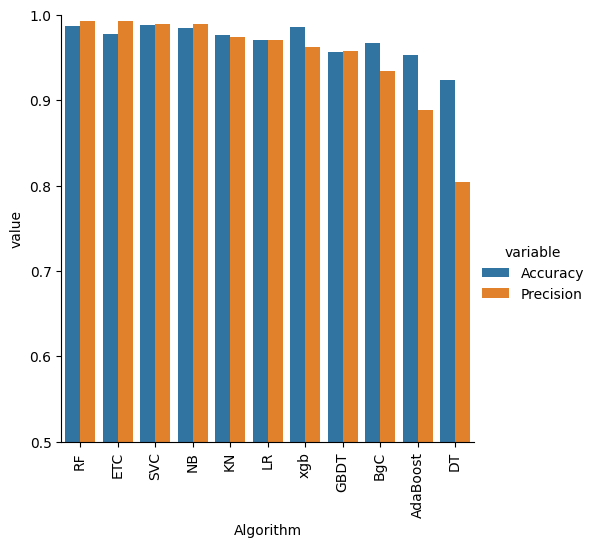

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.986831,0.992832,0.986831,0.992832,0.986831,0.992832,0.986831,0.992832
1,ETC,0.978051,0.992565,0.978051,0.992565,0.978051,0.992565,0.978051,0.992565
2,SVC,0.988586,0.989399,0.988586,0.989399,0.988586,0.989399,0.988586,0.989399
3,NB,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247
4,KN,0.976295,0.974729,0.976295,0.974729,0.976295,0.974729,0.976295,0.974729
5,LR,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696
6,xgb,0.985953,0.962838,0.985953,0.962838,0.985953,0.962838,0.985953,0.962838
7,GBDT,0.956102,0.958015,0.956102,0.958015,0.956102,0.958015,0.956102,0.958015
8,BgC,0.966637,0.934483,0.966637,0.934483,0.966637,0.934483,0.966637,0.934483
9,AdaBoost,0.952590,0.888158,0.952590,0.888158,0.952590,0.888158,0.952590,0.888158


In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [90]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9912203687445127
Precision 0.9929577464788732


In [93]:
# Applying stacking
estimators=[('svm', svc),('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9929762949956101
Precision 0.9895833333333334


In [ ]:
# Train MNB on full dataset before saving
mnb = MultinomialNB()
mnb.fit(X_train, y_train)  # <--- make sure this is called before dumping

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))